In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Import Trento outputs for 60,000 fluctuating events of PbPb collisions at 2.76 TeV with JETSCAPE MAP parameters


In [2]:
trento_out = np.fromfile('trento_MAP_grad.txt', sep=' ')

In [3]:
trento_out = trento_out.reshape(-1,8)

In [4]:
trento_out_df = pd.DataFrame(trento_out,columns=['event_number', 'impact_param', 'npart', 'mult', 'e2',
                                                 'e3', 'e4', 'e5'])

In [5]:
trento_out_df

,event_number,impact_param,npart,mult,e2,e3,e4,e5
0,0.0,14.487664,17.0,42.731850,0.342026,0.257548,0.103424,0.108121
1,1.0,10.054136,131.0,772.948929,0.155311,0.249829,0.248779,0.072891
2,2.0,10.253898,130.0,683.216696,0.374846,0.026389,0.122769,0.070730
3,3.0,5.432680,322.0,2548.940651,0.096801,0.138494,0.066668,0.181312
4,4.0,11.107783,96.0,614.393579,0.358123,0.118075,0.199180,0.084320
...,...,...,...,...,...,...,...,...
64840,36696.0,8.208749,195.0,1197.213366,0.341396,0.069844,0.219055,0.056977
64841,36697.0,10.789487,102.0,634.741838,0.158725,0.141717,0.054858,0.061430
64842,36698.0,0.648300,414.0,3279.031022,0.110551,0.092253,0.088905,0.054846
64843,36699.0,13.218631,41.0,217.867274,0.352972,0.215526,0.138635,0.253795


### Find multiplicity observables by sorting the Trento outputs with integrated reduced thickness

In [6]:
trento_out_df_sorted = trento_out_df.sort_values(by='mult', axis=0, ignore_index=True, ascending=False)

In [7]:
trento_out_df_sorted

,event_number,impact_param,npart,mult,e2,e3,e4,e5
0,4651.0,1.211318,412.0,4008.919427,0.040366,0.110382,0.074996,0.096714
1,29049.0,0.678189,416.0,3921.195470,0.055496,0.016923,0.019767,0.024856
2,23163.0,0.543886,415.0,3900.827134,0.041544,0.064773,0.071621,0.053475
3,6014.0,0.692029,416.0,3832.223291,0.009833,0.051197,0.138641,0.074494
4,12606.0,0.459552,413.0,3831.833103,0.050107,0.026151,0.067841,0.034619
...,...,...,...,...,...,...,...,...
64840,15629.0,18.481429,2.0,0.011466,0.095688,0.001083,0.021417,0.002738
64841,26110.0,17.148714,2.0,0.010325,0.029153,0.004438,0.062907,0.084982
64842,3470.0,18.652154,2.0,0.010282,0.093030,0.010782,0.002886,0.003525
64843,13074.0,17.791769,2.0,0.008388,0.109117,0.011086,0.013973,0.002838


### Calculate $\rho$ for each centrality class

In [8]:
cent_classe = [[0,10],[10,20],[20,30],[30,40],[40,50],[50,60],[60,70],[70,80]]

In [9]:
num_events = len(trento_out_df_sorted)
# We can find event centrality this way
# becausee the events were minimum biased.
event_cen = []

for cen_min, cen_max in cent_classe:
    #print(cen_min,cen_max)
    if cen_min==0:
        n_min=0
    n_max = int(np.floor(num_events * cen_max/100))
    event_cen.append([n_min,n_max])
    n_min = n_max+1
print('Event index ranges corresponding to centralities are as follows')
print(event_cen)

Event index ranges corresponding to centralities are as follows
[[0, 6484], [6485, 12969], [12970, 19453], [19454, 25938], [25939, 32422], [32423, 38907], [38908, 45391], [45392, 51876]]


In [10]:
def calculate_rho(pT_method=0):
    """Calculate rho as a function of centrality using the choosen method to calculate a psuedo observable for pT
    pT_method=0
    -----------
    Calculate pT assuming it's inversely propotional to the integrated reduced thickness function (multiplicity)
    pT_method=1:
    -----------
    Calculate pT assuming it's inversely propotional to the squre root of the integrated reduced
    thickness function (multiplicity)
    pT_method=2:
    Calculate pT assuming it's propotional to the impact parameter
    -----------
    Return : 1D array of calculate rho parameter values"""
    
    
    rho = []
    for n_min, n_max in event_cen:
        v2 = trento_out_df_sorted['e2'][n_min:n_max]
        if pT_method==0:
            pT = np.divide(1,trento_out_df_sorted['mult'][n_min:n_max])
        if pT_method==1:
            pT = np.divide(1,np.sqrt(trento_out_df_sorted['mult'][n_min:n_max]))
        if pT_method==2:
            pT = trento_out_df_sorted['impact_param'][n_min:n_max]
        X = np.vstack((v2,pT))
        #print(X.shape)
        rho_value = np.corrcoef(X)
        #print(rho_value)
        # We want the pearson corellation coefficient between v2 and pT. So take the off diagonal
        rho.append(rho_value[0,1])
    #print(rho)
    return(rho)

In [11]:
pT_methods = ['pT $\propto 1/multiplicity$', 'pT $\propto 1/\sqrt{multiplicity}$','pT $\propto b$']



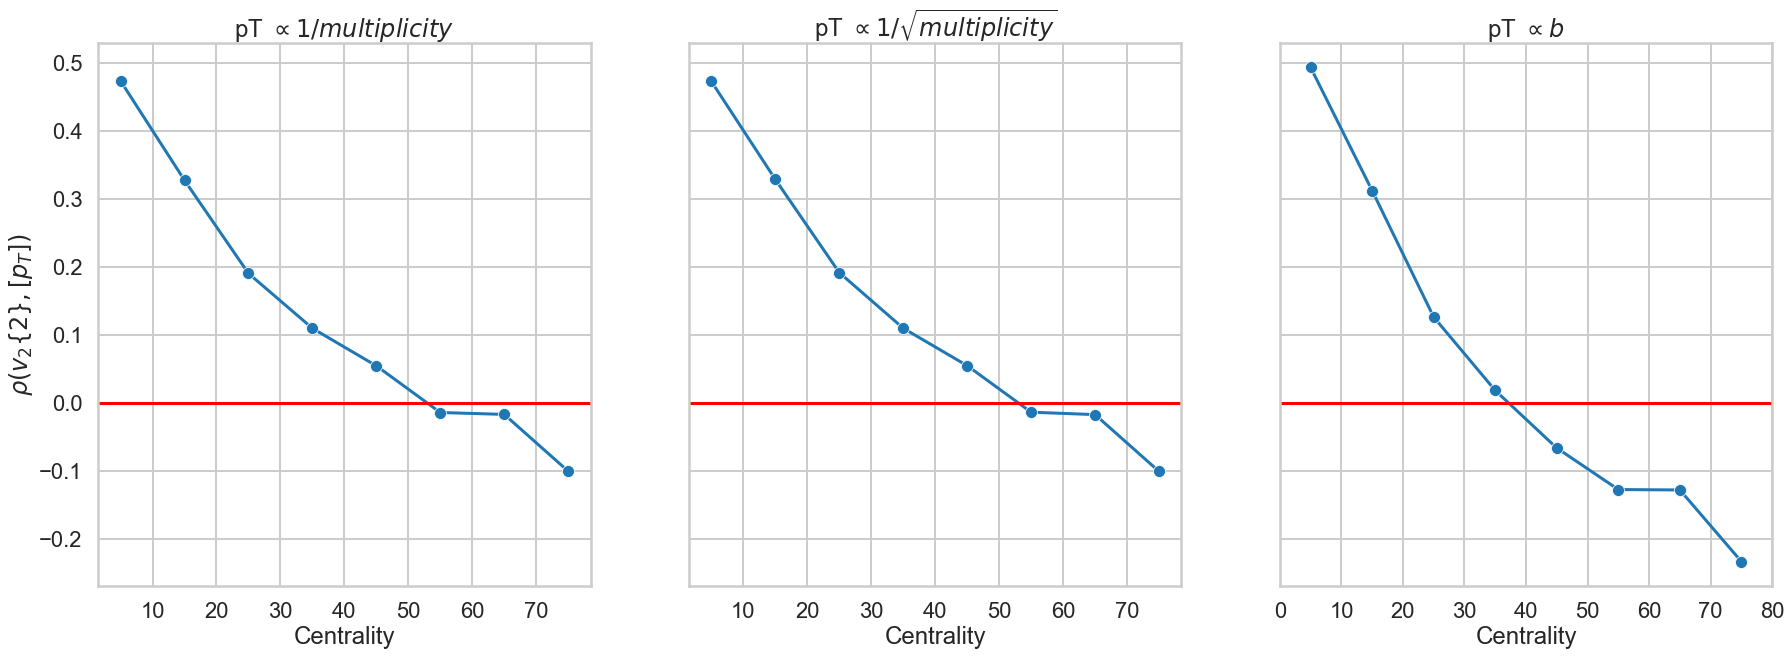

In [14]:
fig, axs = plt.subplots(1,3, figsize=(30,10),sharex=True, sharey=True)
sns.set_style('whitegrid')
#sns.set_context('')
for i, ax in enumerate(axs):
    rho = calculate_rho(i)
    cen_array = [((mn+mx)/2) for mn,mx in cent_classe]
    sns.lineplot(x=cen_array, y=rho, marker="o",ax=ax)
    ax.axhline(color='r')
    ax.set_title(pT_methods[i])
    ax.set_xticks([0,10,20,30,40,50,60,70,80])
    #ax.set_xticklabels([0,10,20,30,40,50,60,70,80])
    ax.set_xlabel('Centrality')
    ax.set_ylabel(r'$\rho(v_2\{2\},[p_T])$')